In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

,x,y,Q
0,-1.626947e+01,36.541818,691.2
1,-2.972579e+01,26.765224,691.2
2,-3.804226e+01,12.360680,691.2
3,-3.978088e+01,-4.181139,691.2
4,-3.464102e+01,-20.000000,691.2
5,-2.351141e+01,-32.360680,691.2
6,-8.316468e+00,-39.125904,691.2
7,8.316468e+00,-39.125904,691.2
8,2.351141e+01,-32.360680,691.2
9,3.464102e+01,-20.000000,691.2


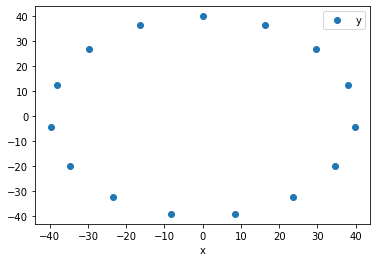

In [11]:
# Create ring of wells; export to wells.txt
origin = (0,0)
radius = 40 # m
split = 15
split_rot = 360/split
Q = 8*1e-3*86400 # L/s to m3/d

coords = []
for i in range(split):
    rot = (i+1)*split_rot
    coords.append(list(rotate(origin, (0,radius), math.radians(rot))))


df = pd.DataFrame(coords, columns=['x','y'])
df['Q'] = Q
df.plot(x='x', y='y', ls='', marker='o')

df.to_csv('wells.txt', index=False, sep='\t')
df
